# JBI100 Visualization 
### Academic year 2025-2026

## Health and Global Statistics
Data sources:

- Hospital Beds Management (https://www.kaggle.com/datasets/jaderz/hospital-beds-management/data)
- CIA Global Statistical Database (https://www.kaggle.com/datasets/kushagraarya10/cia-global-statistical-database)

Data dictionaries and additional info can be found in the respective data folders.
Note: you only need to select one dataset for your project; the dataset that you choose consists of multiple CSV files.

In [821]:
# Import libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import plotly.io as pio
from scipy import stats

# Render plotly in IFrame
pio.renderers.default = 'iframe'

# Do not truncate tables
pd.set_option('display.max_columns', None)

# If you receive a 'ModuleNotFoundError' please install the according library. 
# This can be done from within the Jupyter environment with the command 
#'!python -m pip install lib' where lib is the according library name.

In [822]:
# Load the data

# CIA Global Statistical Database
df_CIA_communications        = pd.read_csv("C:\\Users\\kwane\\PycharmProjects\\dashframework\\CIA Global Statistical Database\\communications_data.csv", delimiter=',', low_memory=False)
df_CIA_demographics          = pd.read_csv('C:\\Users\\kwane\\PycharmProjects\\dashframework\\CIA Global Statistical Database\\demographics_data.csv', delimiter=',', low_memory=False)
df_CIA_economy               = pd.read_csv('C:\\Users\\kwane\\PycharmProjects\\dashframework\\CIA Global Statistical Database\\economy_data.csv', delimiter=',', low_memory=False)
df_CIA_energy                = pd.read_csv('C:\\Users\\kwane\\PycharmProjects\\dashframework\\CIA Global Statistical Database\\energy_data.csv', delimiter=',', low_memory=False)
df_CIA_geography             = pd.read_csv('C:\\Users\\kwane\\PycharmProjects\\dashframework\\CIA Global Statistical Database\\geography_data.csv', delimiter=',', low_memory=False)
df_CIA_government_and_civics = pd.read_csv('C:\\Users\\kwane\\PycharmProjects\\dashframework\\CIA Global Statistical Database\\government_and_civics_data.csv', delimiter=',', low_memory=False)
df_CIA_transportation        = pd.read_csv('C:\\Users\\kwane\\PycharmProjects\\dashframework\\CIA Global Statistical Database\\transportation_data.csv', delimiter=',', low_memory=False)

In [823]:
# df_HBM_patients.sample(5)
# df_HBM_patients.describe()
# fig = px.scatter(df_HBM_patients, x="age", y="satisfaction", color="service", width=1000, height=800)
# fig.show()

## Explore CIA Global Statistical Database

In [824]:
# df_CIA_demographics.sample(5)

In [825]:
# df_CIA_demographics.describe()

In [826]:
# fig = px.bar(df_CIA_demographics, x="Country", y="Total_Population", color="Median_Age", color_continuous_scale='Viridis', log_y=True,width=1500, height=800).update_xaxes(categoryorder="total descending")
# fig.show()

In [827]:
# Datasets: df_CIA_communications, df_CIA_demographics, df_CIA_economy, df_CIA_energy, df_CIA_geography, df_CIA_government_and_civics, df_CIA_transportation

# Check if all Country columns are the same
print("Country columns are the same:")
print(df_CIA_communications["Country"].equals(df_CIA_demographics["Country"]))
print(df_CIA_communications["Country"].equals(df_CIA_economy["Country"]))
print(df_CIA_communications["Country"].equals(df_CIA_energy["Country"]))
print(df_CIA_communications["Country"].equals(df_CIA_geography["Country"]))
print(df_CIA_communications["Country"].equals(df_CIA_government_and_civics["Country"]))
print(df_CIA_communications["Country"].equals(df_CIA_transportation["Country"]))

Country columns are the same:
True
True
True
True
False
True


In [828]:
# Check what is missing in the df_CIA_government_and_civics dataset
print("Missing countries in df_CIA_government_and_civics:")
for i in range(len(df_CIA_communications["Country"])):
    if df_CIA_communications["Country"][i] not in df_CIA_government_and_civics["Country"].values:
        print(df_CIA_communications["Country"][i])

Missing countries in df_CIA_government_and_civics:
BRITISH INDIAN OCEAN TERRITORY
HAITI
NAMIBIA
NEW ZEALAND
SPAIN
SPRATLY ISLANDS


In [829]:
# Merge datasets into df_total
df_total = pd.merge(df_CIA_communications, df_CIA_demographics, on="Country")
df_total = pd.merge(df_total, df_CIA_economy, on="Country")
df_total = pd.merge(df_total, df_CIA_energy, on="Country")
df_total = pd.merge(df_total, df_CIA_geography, on="Country")
df_total = pd.merge(df_total, df_CIA_government_and_civics, on="Country", how="left")
df_total = pd.merge(df_total, df_CIA_transportation, on="Country")


In [830]:
# Make a series with the number of NaNs per cat
nan_per_cat = df_total.isna().sum()

# Print NaNs per cat
for key, value in sorted(nan_per_cat.items(), key=lambda x: x[1], reverse=False):
    print(f"{key:<50} : {value:>5} NaNs")

# Look at the cat with the most NaNs (water_pipelines_km)
# print(df_CIA_transportation.columns)
# for i in df_CIA_transportation["water_pipelines_km"]:
#     if not pd.isna(i):
#         print(i)
# print("water_pipelines_km is NaN:", df_CIA_transportation["water_pipelines_km"].isna().sum())
# print("water_pipelines_km total:", len(df_CIA_transportation["water_pipelines_km"]))

Country                                            :     0 NaNs
Geographic_Coordinates                             :     3 NaNs
Area_Total                                         :     3 NaNs
Coastline                                          :     4 NaNs
Lowest_Elevation                                   :     4 NaNs
Land_Boundaries                                    :     9 NaNs
Land_Area                                          :    12 NaNs
Water_Area                                         :    14 NaNs
Highest_Elevation                                  :    20 NaNs
Other_Land                                         :    20 NaNs
Agricultural_Land                                  :    21 NaNs
Total_Population                                   :    22 NaNs
Population_Growth_Rate                             :    22 NaNs
internet_country_code                              :    29 NaNs
Death_Rate                                         :    29 NaNs
Net_Migration_Rate                      

In [831]:
# Make a series with the number of NaNs per country
nan_per_country = df_total.isna().sum(axis=1)

# Print NaNs per country
for key, value in sorted(nan_per_country.items(), key=lambda x: x[1], reverse=False):
    print(f"{df_total["Country"][key]:<50} : {value:>5} NaNs")

INDIA                                              :     1 NaNs
RUSSIA                                             :     1 NaNs
BELARUS                                            :     2 NaNs
BRAZIL                                             :     2 NaNs
BULGARIA                                           :     2 NaNs
BURMA                                              :     2 NaNs
CHINA                                              :     2 NaNs
GERMANY                                            :     2 NaNs
ITALY                                              :     2 NaNs
MALAYSIA                                           :     2 NaNs
NIGERIA                                            :     2 NaNs
POLAND                                             :     2 NaNs
ROMANIA                                            :     2 NaNs
SYRIA                                              :     2 NaNs
THAILAND                                           :     2 NaNs
TURKEY (TURKIYE)                        

In [832]:
# Column names of df_total
print(df_total.columns)

Index(['Country', 'telephone_fixed_subscriptions_total',
       'mobile_cellular_subscriptions_total', 'internet_country_code',
       'internet_users_total', 'broadband_fixed_subscriptions_total',
       'Total_Population', 'Population_Growth_Rate', 'Birth_Rate',
       'Death_Rate', 'Net_Migration_Rate', 'Median_Age', 'Sex_Ratio',
       'Infant_Mortality_Rate', 'Total_Fertility_Rate', 'Total_Literacy_Rate',
       'Male_Literacy_Rate', 'Female_Literacy_Rate', 'Youth_Unemployment_Rate',
       'Real_GDP_PPP_billion_USD', 'GDP_Official_Exchange_Rate_billion_USD',
       'Real_GDP_Growth_Rate_percent', 'Real_GDP_per_Capita_USD',
       'Unemployment_Rate_percent', 'Youth_Unemployment_Rate_percent',
       'Budget_billion_USD', 'Budget_Surplus_billion_USD',
       'Budget_Deficit_percent_of_GDP', 'Public_Debt_percent_of_GDP',
       'Fiscal_Year', 'Exports_billion_USD', 'Imports_billion_USD',
       'Exchange_Rate_per_USD', 'Population_Below_Poverty_Line_percent',
       'electricity_ac

Summary of Death_Rate:
count    230.00
mean      25.02
std      187.37
min        1.42
25%        5.70
50%        7.26
75%        9.10
max     2021.00
Name: Death_Rate, dtype: float64
NaNs     29


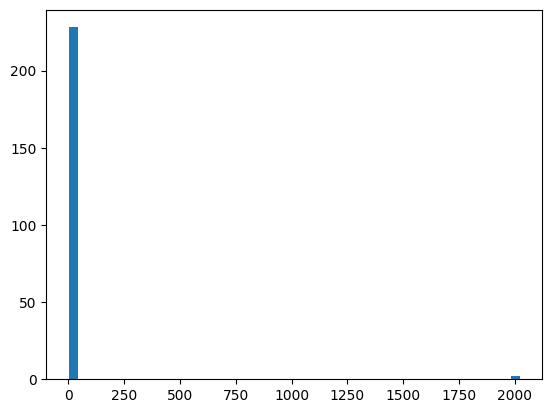

In [833]:
# Summarize function: prints basic info and hist
def summarize(df: pd.DataFrame, cat: str):
    pd.set_option("display.float_format", "{:.2f}".format)
    print(f"Summary of {cat}:")
    print(df[cat].describe())
    if cat in nan_per_cat.keys():
        print(f"NaNs {nan_per_cat[cat]:>6}")
    try:
        plt.hist(df[cat], bins=50)
        plt.show()
    except:
        print("Histogram plotting error")
    # print(df[cat])

# Median_Age
summarize(df_total, "Death_Rate")

In [834]:
# Function to get the countries that have values within a range(min, max) for a certain cat
def get_countries_in_range(df: pd.DataFrame, cat: str, min: float, max: float):
    subset = df[(df[cat] >= min) & (df[cat] <= max)]
    countries_in_range = subset[["Country", cat]]
    print(countries_in_range)

get_countries_in_range(df_total, "Death_Rate", 250, 5000)

            Country  Death_Rate
78   EUROPEAN UNION     2021.00
232         TOKELAU     2021.00


In [835]:
# Check outlier function: Goes through all cats and checks for outliers, prints findings
# outlier_check_fails: Contains all cats with more than one non float
def check_outliers(df: pd.DataFrame):
    fail_list = []
    for i in df.columns:
        try:
            z_scores = np.abs(stats.zscore(df[i], nan_policy="omit"))
            outliers = df[z_scores > 3]
            if len(outliers)>0:
                print(outliers[["Country", i]])
            else:
                print(f"No outliers for:    {i}")
            print("---------------------------------------------------")
        except:
            fail_list.append(i)
    print(f"Failed to look for outliers in: {fail_list}")
    print(f"Number of categories failed to check: {len(fail_list)}")
    return fail_list

outlier_check_fails = check_outliers(df_total)

    Country  telephone_fixed_subscriptions_total
255   WORLD                         901317598.00
---------------------------------------------------
            Country  mobile_cellular_subscriptions_total
49            CHINA                        1750460000.00
78   EUROPEAN UNION                         540557924.00
109           INDIA                        1166310000.00
---------------------------------------------------
            Country  broadband_fixed_subscriptions_total
49            CHINA                         483550000.00
78   EUROPEAN UNION                         163772540.00
244   UNITED STATES                         119870000.00
---------------------------------------------------
           Country  Birth_Rate
78  EUROPEAN UNION     2020.00
---------------------------------------------------
            Country  Death_Rate
78   EUROPEAN UNION     2021.00
232         TOKELAU     2021.00
---------------------------------------------------
                            

In [836]:
# Float check function: Checks and prints number non floats in dataset
# print_bool: True -> Print cat, country and value that is non float
# print_bool: False -> Print total number of non floats per cat
def float_check(df: pd.DataFrame, cat: list, print_bool: bool):
    for i in cat:
        cat_failure_counter = 0
        for index, value in df[i].items():
            try:
                float(value)
            except:
                if print_bool:
                    print(f"Category: {i:<50} Country: {df["Country"][index]:<50} Value: {value:>5}")
                cat_failure_counter += 1
        if not print_bool:
            print(f"Category: {i:<50} Failure counter: {cat_failure_counter:>5}")

float_check(df_total, outlier_check_fails, False)

Category: Country                                            Failure counter:   259
Category: internet_country_code                              Failure counter:   230
Category: internet_users_total                               Failure counter:     3
Category: Total_Population                                   Failure counter:     5
Category: Population_Growth_Rate                             Failure counter:   237
Category: Total_Literacy_Rate                                Failure counter:   168
Category: Male_Literacy_Rate                                 Failure counter:   212
Category: Female_Literacy_Rate                               Failure counter:   212
Category: Youth_Unemployment_Rate                            Failure counter:   206
Category: Fiscal_Year                                        Failure counter:   215
Category: Geographic_Coordinates                             Failure counter:   256
Category: Area_Total                                         Failure counter

In [837]:
# Check the data per cat
float_check(df_total, ["Total_Population"], True)

Category: Total_Population                                   Country: HAITI                                              Value: 11,334,637
Category: Total_Population                                   Country: NAMIBIA                                            Value: 2,727,409
Category: Total_Population                                   Country: NEW ZEALAND                                        Value: 5,223,100
Category: Total_Population                                   Country: PHILIPPINES                                        Value: 109,035,343
Category: Total_Population                                   Country: SPAIN                                              Value: 47,222,613


In [838]:
# Data type/format per column:
# Country                                               str
# internet_country_code                                 str
# internet_users_total                                  80 (percentage)
# Total_Population                                      11,334,637
# Population_Growth_Rate                                0.93%
# Total_Literacy_Rate                                   98.8%
# Male_Literacy_Rate                                    97.4%
# Female_Literacy_Rate                                  83.3%
# Youth_Unemployment_Rate                               14.9%
# Fiscal_Year                                           str
# Geographic_Coordinates                                str
# Area_Total                                            1,910 sq km OR 1.267 million sq km
# Land_Area                                             995,450 sq km OR 148.94 million sq km
# Water_Area                                            361,899,999 sq km OR NEGL OR negligible
# Land_Boundaries                                       5,920 km
# Coastline                                             2,800 km
# Highest_Elevation                                     1,020 m
# Lowest_Elevation                                      -40 m
# Forest_Land                                           10.2%
# Other_Land                                            17.2%
# Agricultural_Land                                     34.8%
# Arable_Land (%% of Total Agricultural Land)           20.6%
# Permanent_Crops (%% of Total Agricultural Land)       10.3%
# Permanent_Pasture (%% of Total Agricultural Land)     51.7%
# Irrigated_Land                                        12,605 sq km
# Capital                                               str OR (Some strings have descriptions too)
# Capital_Coordinates                                   str
# Government_Type                                       Theocracy OR Republic OR Democracy OR Other OR Monarchy OR Territory
# airports_paved_runways_count                          5,080
# airports_unpaved_runways_count                        8,977
# heliports_count                                       5,664
# roadways_km                                           4,960,600
# railways_km                                           150,000
# waterways_km                                          110,000

print(df_total["internet_users_total"])

0               7020000
1                   NaN
2               2291000
3              31240000
4                 18135
             ...       
254             3938199
255    5.3 (percentage)
256             8229624
257             3990000
258             5600000
Name: internet_users_total, Length: 259, dtype: object


In [ ]:
# I'll complete and make this part more efficient later:

In [839]:
def data_cleaner(df: pd.DataFrame, cat: list):
    fail_counter = 0
    fail_counter_2 = 0
    for i in cat:
        for idx, val in df[i].items():
            if not pd.isnull(val):
                try:
                    df.loc[idx, i] = float(val)
                except:
                    fail_counter += 1
                    v = str(val)
                    try:
                        v = v.replace("%", "")
                    except:
                        pass
                    try:
                        v = v.replace(" sq km", "")
                    except:
                        pass
                    try:
                        v = v.replace(" km", "")
                    except:
                        pass
                    try:
                        v = v.replace(",", "")
                    except:
                        pass
                    try:
                        df.loc[idx, i] = float(v)
                    except:
                        print(f"Category: {i:<50} Country: {df["Country"][idx]:<50} Value: {v:>5}")
                        fail_counter_2 += 1
    print(f"Fixed {fail_counter_2} out of {fail_counter} faulty variables")

remove = ["Country", "internet_country_code", "Fiscal_Year", "Geographic_Coordinates", "Capital", "Capital_Coordinates"]
for i in remove:
    if i in outlier_check_fails:
        outlier_check_fails.remove(i)

data_cleaner(df_total, outlier_check_fails)

Category: internet_users_total                               Country: COCOS (KEELING) ISLANDS                            Value: 80 (percentage)
Category: internet_users_total                               Country: PITCAIRN ISLANDS                                   Value: 37 (percentage)
Category: internet_users_total                               Country: WORLD                                              Value: 5.3 (percentage)
Category: Area_Total                                         Country: ANTARCTICA                                         Value: 14.2 million
Category: Area_Total                                         Country: ARCTIC OCEAN                                       Value: 15.558 million
Category: Area_Total                                         Country: ATLANTIC OCEAN                                     Value: 85.133 million
Category: Area_Total                                         Country: CHAD                                               Value: 1.284 millio

In [840]:
# Check if values were fixed properly (%)
for index, country in df_total["Country"].items():
    if country in ["HAITI", "NAMIBIA", "NEW ZEALAND", "PHILIPPINES", "SPAIN"]:
        print(f"Country: {country:<110}, Value: {df_total["Population_Growth_Rate"][index]:>5}")

Country: HAITI                                                                                                         , Value:  2.23
Country: NAMIBIA                                                                                                       , Value:  1.83
Country: NEW ZEALAND                                                                                                   , Value:  0.92
Country: PHILIPPINES                                                                                                   , Value:  1.58
Country: SPAIN                                                                                                         , Value:  0.12


In [841]:
# Check if values were fixed properly (,)
for index, country in df_total["Country"].items():
    if country in ["HAITI", "NAMIBIA", "NEW ZEALAND", "PHILIPPINES", "SPAIN"]:
        print(f"Country: {country:<110}, Value: {df_total["Total_Population"][index]:>5}")

Country: HAITI                                                                                                         , Value: 11334637.0
Country: NAMIBIA                                                                                                       , Value: 2727409.0
Country: NEW ZEALAND                                                                                                   , Value: 5223100.0
Country: PHILIPPINES                                                                                                   , Value: 109035343.0
Country: SPAIN                                                                                                         , Value: 47222613.0


In [842]:
check_outliers(df_total);

    Country  telephone_fixed_subscriptions_total
255   WORLD                         901317598.00
---------------------------------------------------
            Country  mobile_cellular_subscriptions_total
49            CHINA                        1750460000.00
78   EUROPEAN UNION                         540557924.00
109           INDIA                        1166310000.00
---------------------------------------------------
            Country  broadband_fixed_subscriptions_total
49            CHINA                         483550000.00
78   EUROPEAN UNION                         163772540.00
244   UNITED STATES                         119870000.00
---------------------------------------------------
           Country  Birth_Rate
78  EUROPEAN UNION     2020.00
---------------------------------------------------
            Country  Death_Rate
78   EUROPEAN UNION     2021.00
232         TOKELAU     2021.00
---------------------------------------------------
                            

In [843]:
print(df_total.columns[0])

Country


In [844]:
df_total.sample(5)

,Country,telephone_fixed_subscriptions_total,mobile_cellular_subscriptions_total,internet_country_code,internet_users_total,broadband_fixed_subscriptions_total,Total_Population,Population_Growth_Rate,Birth_Rate,Death_Rate,Net_Migration_Rate,Median_Age,Sex_Ratio,Infant_Mortality_Rate,Total_Fertility_Rate,Total_Literacy_Rate,Male_Literacy_Rate,Female_Literacy_Rate,Youth_Unemployment_Rate,Real_GDP_PPP_billion_USD,GDP_Official_Exchange_Rate_billion_USD,Real_GDP_Growth_Rate_percent,Real_GDP_per_Capita_USD,Unemployment_Rate_percent,Youth_Unemployment_Rate_percent,Budget_billion_USD,Budget_Surplus_billion_USD,Budget_Deficit_percent_of_GDP,Public_Debt_percent_of_GDP,Fiscal_Year,Exports_billion_USD,Imports_billion_USD,Exchange_Rate_per_USD,Population_Below_Poverty_Line_percent,electricity_access_percent,electricity_generating_capacity_kW,coal_metric_tons,petroleum_bbl_per_day,refined_petroleum_products_bbl_per_day,refined_petroleum_exports_bbl_per_day,refined_petroleum_imports_bbl_per_day,natural_gas_cubic_meters,carbon_dioxide_emissions_Mt,Geographic_Coordinates,Area_Total,Land_Area,Water_Area,Land_Boundaries,Coastline,Highest_Elevation,Lowest_Elevation,Forest_Land,Other_Land,Agricultural_Land,Arable_Land (%% of Total Agricultural Land),Permanent_Crops (%% of Total Agricultural Land),Permanent_Pasture (%% of Total Agricultural Land),Irrigated_Land,Capital,Capital_Coordinates,Government_Type,Suffrage_Age,airports_paved_runways_count,airports_unpaved_runways_count,heliports_count,roadways_km,railways_km,waterways_km,gas_pipelines_km,oil_pipelines_km,refined_products_pipelines_km,water_pipelines_km
164,NEW CALEDONIA,46000.00,260000.00,.nc,237800.00,55000.00,300682.00,1.17,13.96,5.92,3.62,32.90,0.99,4.92,1.84,96.90,97.30,96.50,41.00,10.27,9.77,2.00,35700.00,16.57,41.00,2.00,0.00,0.00,6.50,calendar year,1.92,2.26,100.88,17.00,100.00,1071000.00,0.00,0.00,NaN,NaN,19100.00,NaN,5.00,"21 30 S, 165 30 E",18575.00,18275.00,300.00,0.00,2254.00,"1,628 m",0 m,45.90,43.70,10.40,0.40,0.20,9.80,100.00,Noumea,"22 16 S, 166 27 E",Democracy,18.00,12.00,13.00,8.00,5622.00,NaN,NaN,NaN,NaN,NaN,NaN
28,BHUTAN,19680.00,778008.00,.bt,670800.00,3189.00,876181.00,0.96,15.61,6.05,0.00,29.10,1.07,25.61,1.77,70.90,77.90,62.80,18.80,8.48,2.40,4.09,10900.00,4.33,18.80,710.00,3.40,-3.40,117.33,1 July - 30 June,741.60,1.03,73.94,8.20,100.00,2334000.00,174000.00,0.00,0.00,0.00,3120.00,NaN,934000.00,"27 30 N, 90 30 E",38394.00,38394.00,0.00,1136.00,0.00,"7,570 m",97 m,85.50,0.90,13.60,2.60,0.30,10.70,320.00,Thimphu,"27 28 N, 89 38 E",Monarchy,18.00,2.00,1.00,NaN,12205.00,NaN,NaN,NaN,NaN,NaN,NaN
48,CHILE,2510972.00,26571823.00,.cl,17100000.00,3763826.00,18549457.00,0.63,12.57,6.58,0.32,35.50,0.97,6.41,1.75,97.00,31.60,26.80,21.40,496.08,NaN,11.67,25400.00,9.13,21.40,55.16,2.80,-2.80,23.60,calendar year,100.63,102.09,758.96,8.60,100.00,29808000.00,542000.00,11900.00,216200.00,7359.00,166400.00,1109962000.00,88.00,"30 00 S, 71 00 W",756102.00,743812.00,12290.00,7801.00,6435.00,"6,893 m",0 m,21.90,57.00,21.10,1.70,0.60,18.80,11100.00,Santiago; note - Valparaiso is the seat of the...,"33 27 S, 70 40 W",Republic,18.00,90.00,391.00,1.00,77801.00,NaN,NaN,3160.00,985.00,NaN,NaN
116,ISRAEL,3500000.00,12500000.00,.il,8010000.00,2602079.00,9043387.00,1.43,17.30,5.05,1.99,30.40,1.01,3.49,2.54,97.80,28.90,13.50,8.80,393.86,394.93,8.61,42100.00,5.05,8.80,139.37,2.00,-2.00,72.60,calendar year,143.88,124.58,3.23,22.00,100.00,18993000.00,0.00,0.00,294300.00,111700.00,98860.00,10474000000.00,61.00,"31 30 N, 34 45 E",21937.00,21497.00,440.00,1068.00,273.00,NaN,-431 m,7.10,69.10,23.80,13.70,3.80,6.30,2159.00,Jerusalem; note - the US recognized Jerusalem ...,"31 46 N, 35 14 E",Democracy,18.00,33.00,9.00,3.00,20391.00,1497.00,NaN,763.00,442.00,NaN,NaN
197,SAINT PIERRE AND MIQUELON,4800.00,NaN,.pm,5099.00,NaN,5195.00,1.19,6.50,11.40,7.10,50.60,0.94,8.00,1.59,NaN,NaN,NaN,NaN,261.30,261.30,NaN,46200.00,8.70,NaN,70.00,3.80,3.80,NaN,calendar year,6.64,95.35,0.89,NaN,NaN,26000.00,NaN,0.00,NaN,NaN,650.